In [8]:
!pip install tensorflow

In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test: (10000,)


In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', name='L1'),
    keras.layers.Dense(10, activation='softmax', name='L2')])

E:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="sgd", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7377 - loss: 1.0254 - val_accuracy: 0.9025 - val_loss: 0.3590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9011 - loss: 0.3578 - val_accuracy: 0.9177 - val_loss: 0.2971
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9166 - loss: 0.2923 - val_accuracy: 0.9271 - val_loss: 0.2660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9232 - loss: 0.2730 - val_accuracy: 0.9333 - val_loss: 0.2423
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9317 - loss: 0.2410 - val_accuracy: 0.9379 - val_loss: 0.2236
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9378 - loss: 0.2221 - val_accuracy: 0.9423 - val_loss: 0.2085
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9424 - loss: 0.2036 - val_accuracy: 0.9437 - val_loss: 0.1934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9465 - loss: 0.1921 - 

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.1930
Test Loss:  0.16538017988204956
Test Accuracy:  0.95169997215271


In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: %.3f" %test_loss)
print("Test Accuracy: %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9443 - loss: 0.1926
Test Loss: 0.165
Test Accuracy: 0.952


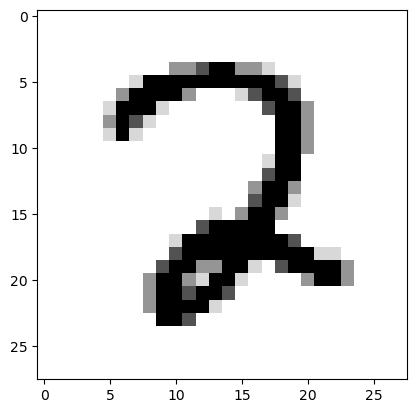

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Value= 2
Actual Value= 2


In [59]:
n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap='Greys')
plt.show()
predicted_value = model.predict(x_test)
print("Predicted Value= %d" %np.argmax(predicted_value[n]))
print(f"Actual Value= {y_test[n]}")

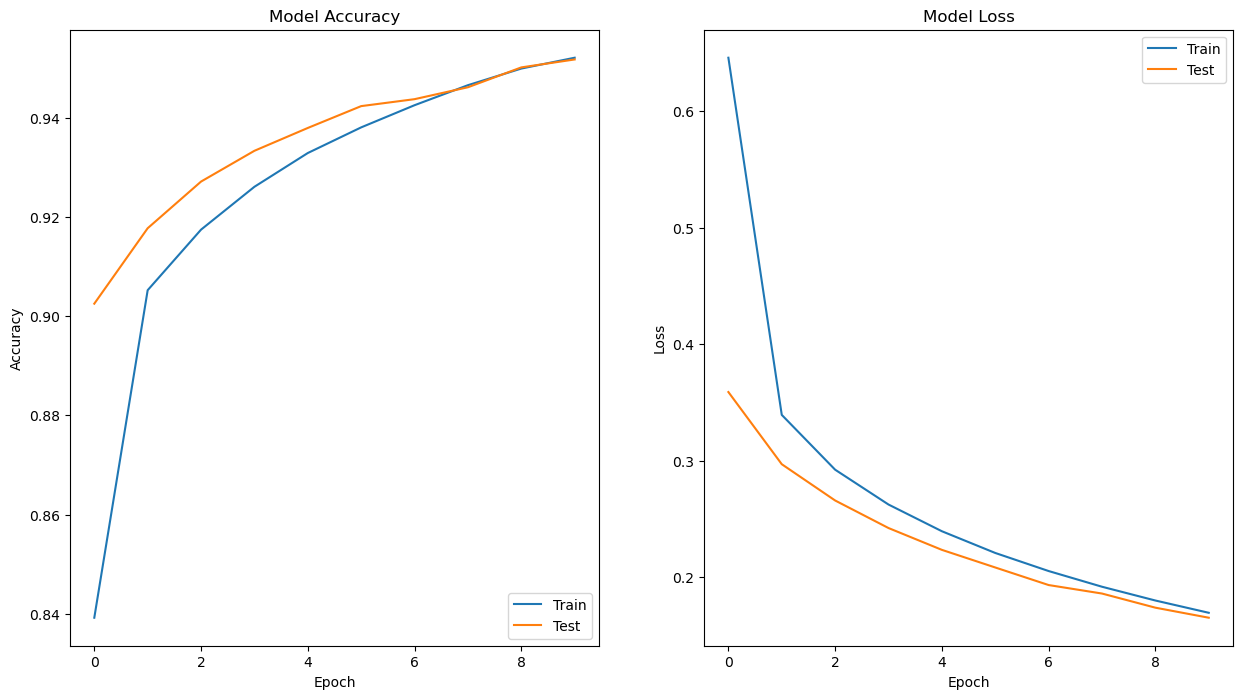

In [61]:
plt.figure(figsize=[15,8])

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

In [ ]:
print(history.history.keys())